In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1.Exploratory Data Analysis (EDA)

#### Start by loading the dataset and examining the first few rows to understand its structure and contents

In [63]:
# Load dataset
df = pd.read_csv("Startup_Data_Preprocessing.csv")

In [64]:
# Dataset ka size (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (7326, 30)


In [65]:
#  first few rows 
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
  category_code     status  founded_at first_investment_at last_investment_at  \
0       medical  operating        2006                 NaN                NaN   
1    enterprise  operating        2004                 NaN                NaN   
2           web  operating        2006                 NaN                NaN   
3      software  operating        1996                 NaN                NaN   
4     education  operating        2009                 NaN                NaN   

   investment_rounds  first_funding_at  last_funding_at  funding_rounds  \
0          15.679245            2011.0           2012.0             2.0   
1          15.679245            2011.0           2011.0             1.0   
2          15.679245            2007.0           2007.0             1.0   
3          15.679245            2011.0           2012.0             2.0   
4          15.679245            2011.0           2011.0             1.0   

   funding_total_usd  ...  country_G

#### Check for missing values in each feature and handle them appropriately (e.g., imputation or removal)

In [66]:
# Check for missing values in each feature
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
category_code             0
status                    0
founded_at                0
first_investment_at    7273
last_investment_at     7273
investment_rounds         0
first_funding_at          0
last_funding_at           0
funding_rounds            0
funding_total_usd         0
first_milestone_at        0
last_milestone_at         0
milestones                0
relationships             0
lat                       0
lng                       0
country_CAN               0
country_DEU               0
country_ESP               0
country_FRA               0
country_GBR               0
country_IND               0
country_IRL               0
country_ISR               0
country_SWE               0
country_USA               0
country_other             0
isClosed                  0
active_days               0
Operating_Status          0
dtype: int64


In [67]:
# Check for missing values in Percentage
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of missing values per column:
category_code           0.000000
status                  0.000000
founded_at              0.000000
first_investment_at    99.276549
last_investment_at     99.276549
investment_rounds       0.000000
first_funding_at        0.000000
last_funding_at         0.000000
funding_rounds          0.000000
funding_total_usd       0.000000
first_milestone_at      0.000000
last_milestone_at       0.000000
milestones              0.000000
relationships           0.000000
lat                     0.000000
lng                     0.000000
country_CAN             0.000000
country_DEU             0.000000
country_ESP             0.000000
country_FRA             0.000000
country_GBR             0.000000
country_IND             0.000000
country_IRL             0.000000
country_ISR             0.000000
country_SWE             0.000000
country_USA             0.000000
country_other           0.000000
isClosed                0.000000
active_days             0.000000
O

In [68]:
print(df.isnull().sum().sum())

14546


In [69]:
## Fill numerical missing values with mean
df_clean = df.copy()

# Numerical columns -> fill with mean
for col in df_clean.select_dtypes(include='number').columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Categorical columns -> fill with mode
for col in df_clean.select_dtypes(exclude='number').columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("Missing values after imputation:")
print(df_clean.isnull().sum())

Missing values after imputation:
category_code          0
status                 0
founded_at             0
first_investment_at    0
last_investment_at     0
investment_rounds      0
first_funding_at       0
last_funding_at        0
funding_rounds         0
funding_total_usd      0
first_milestone_at     0
last_milestone_at      0
milestones             0
relationships          0
lat                    0
lng                    0
country_CAN            0
country_DEU            0
country_ESP            0
country_FRA            0
country_GBR            0
country_IND            0
country_IRL            0
country_ISR            0
country_SWE            0
country_USA            0
country_other          0
isClosed               0
active_days            0
Operating_Status       0
dtype: int64


In [70]:
df

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,NaN,NaN,15.679245,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,NaN,NaN,15.679245,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,NaN,NaN,15.679245,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,NaN,NaN,15.679245,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,NaN,NaN,15.679245,2008.0,2008.0,2.0,600000.0,...,False,False,False,False,False,True,False,1,4745,Operating
7322,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,10000000.0,...,False,True,False,False,False,False,False,1,5475,Operating
7323,enterprise,operating,2011,NaN,NaN,15.679245,2011.0,2011.0,1.0,750000.0,...,False,False,False,False,False,True,False,1,3650,Operating
7324,web,operating,2007,NaN,NaN,15.679245,2008.0,2008.0,1.0,798679.0,...,False,False,False,False,False,False,True,1,5110,Operating


In [71]:
# Removing these two columns because they contain 100% NaN values (no useful data)
df_clean = df_clean.drop(columns=['first_investment_at', 'last_investment_at'])

# Shape check karo (verify columns remove hue)
print(df_clean.shape)

(7326, 28)


#### Compute summary statistics (mean, median, min, max, standard deviation, etc.) for numerical features

In [72]:
# Select only the numerical columns
numeric_cols = df_clean.select_dtypes(include='number')

In [73]:
# Calculate summary statistics (mean, min, max, standard deviation, etc.)
summary_stats = numeric_cols.describe().T  # .T for better table view
print("\nBasic Summary Statistics:")
print(summary_stats)


Basic Summary Statistics:
                     count          mean           std            min  \
founded_at          7326.0  2.006623e+03  7.030586e+00    1906.000000   
investment_rounds   7326.0  1.567925e+01  5.590772e+00       1.000000   
first_funding_at    7326.0  2.010654e+03  2.386757e+00    1987.000000   
last_funding_at     7326.0  2.011109e+03  2.296891e+00    1987.000000   
funding_rounds      7326.0  1.328965e+00  4.698694e-01       1.000000   
funding_total_usd   7326.0  3.414547e+06  2.871523e+06  512000.000000   
first_milestone_at  7326.0  2.010465e+03  2.209811e+00    1978.000000   
last_milestone_at   7326.0  2.011126e+03  2.084369e+00    1978.000000   
milestones          7326.0  1.578409e+00  5.721751e-01       1.000000   
relationships       7326.0  4.752173e+00  1.459898e+01       1.000000   
lat                 7326.0  3.906125e+01  1.231579e+01     -41.286460   
lng                 7326.0 -6.443542e+01  6.131145e+01    -157.858333   
isClosed            7326

In [74]:
# Add the median separately (describe() does not give a “median” column)
summary_stats['median'] = numeric_cols.median()
print("\nSummary Statistics with Median:")
print(summary_stats)


Summary Statistics with Median:
                     count          mean           std            min  \
founded_at          7326.0  2.006623e+03  7.030586e+00    1906.000000   
investment_rounds   7326.0  1.567925e+01  5.590772e+00       1.000000   
first_funding_at    7326.0  2.010654e+03  2.386757e+00    1987.000000   
last_funding_at     7326.0  2.011109e+03  2.296891e+00    1987.000000   
funding_rounds      7326.0  1.328965e+00  4.698694e-01       1.000000   
funding_total_usd   7326.0  3.414547e+06  2.871523e+06  512000.000000   
first_milestone_at  7326.0  2.010465e+03  2.209811e+00    1978.000000   
last_milestone_at   7326.0  2.011126e+03  2.084369e+00    1978.000000   
milestones          7326.0  1.578409e+00  5.721751e-01       1.000000   
relationships       7326.0  4.752173e+00  1.459898e+01       1.000000   
lat                 7326.0  3.906125e+01  1.231579e+01     -41.286460   
lng                 7326.0 -6.443542e+01  6.131145e+01    -157.858333   
isClosed          

#### Visualize the distributions of numerical features using histograms or kernel density plots

In [75]:
# Set plot style for better visuals
sns.set_style('whitegrid')

In [76]:
# List numerical columns
numeric_cols = df_clean.select_dtypes(include='number').columns

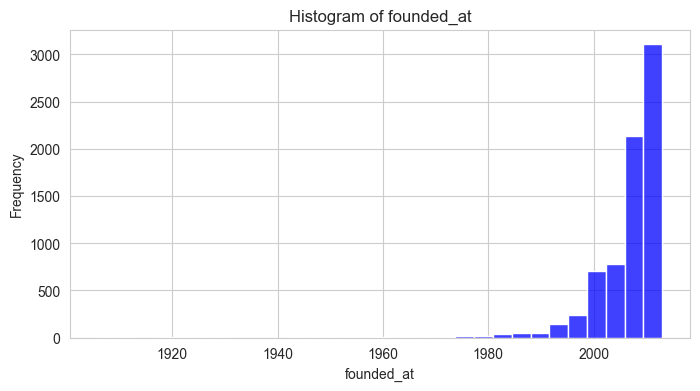

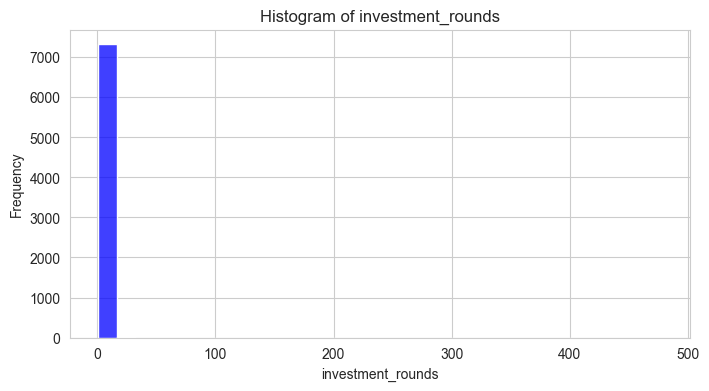

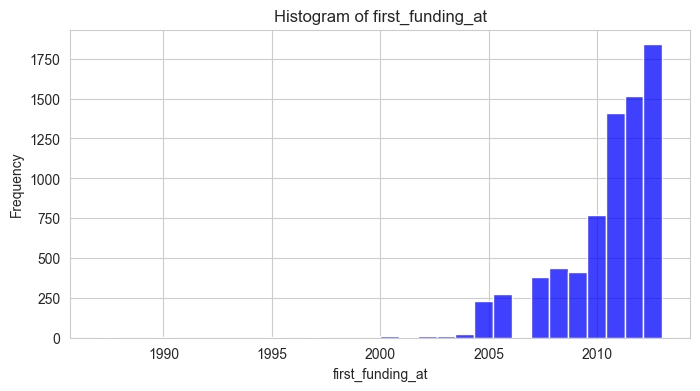

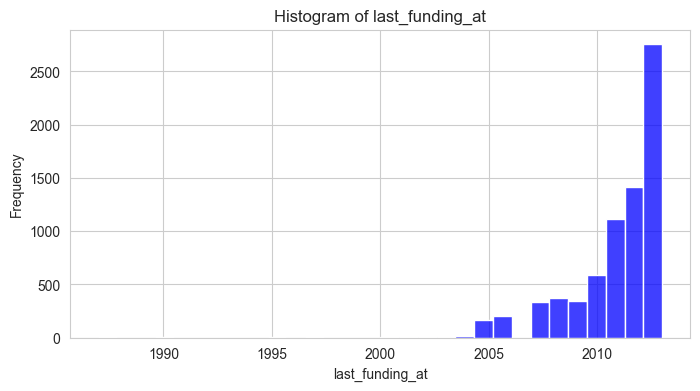

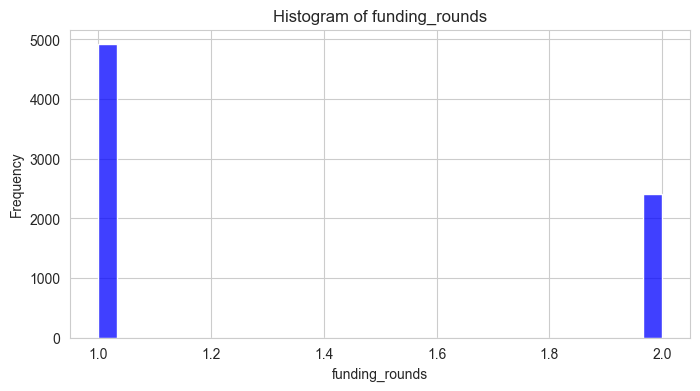

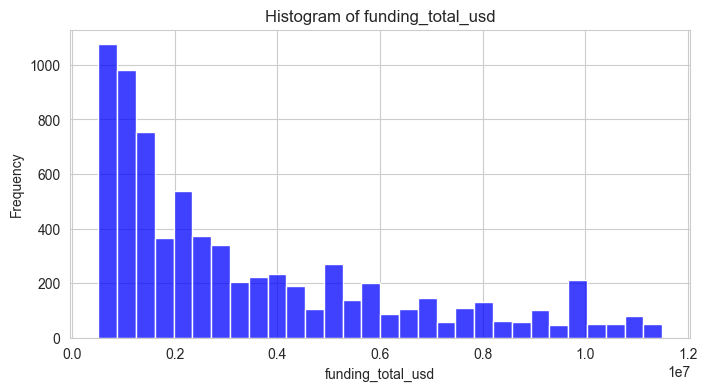

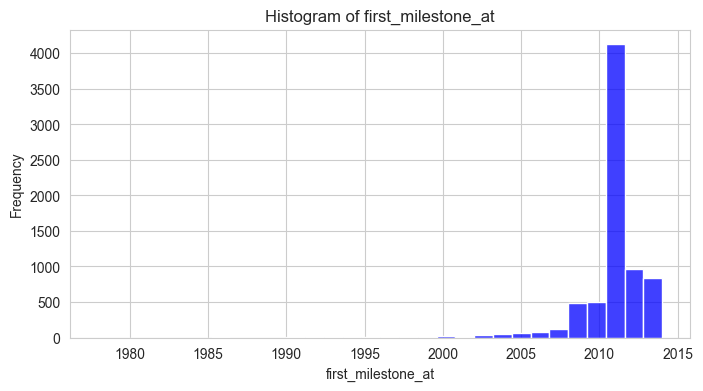

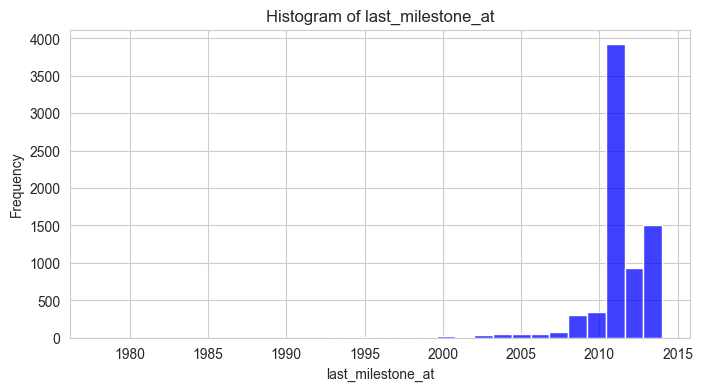

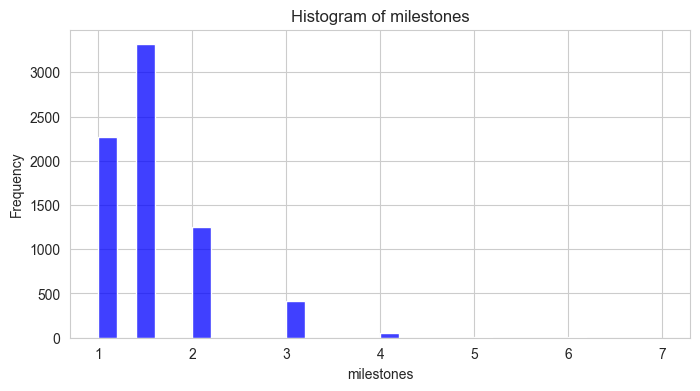

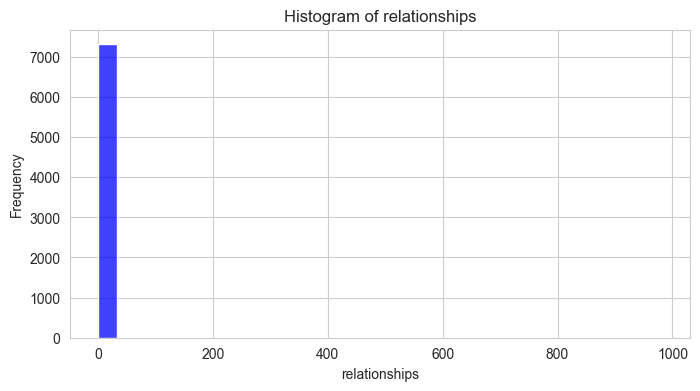

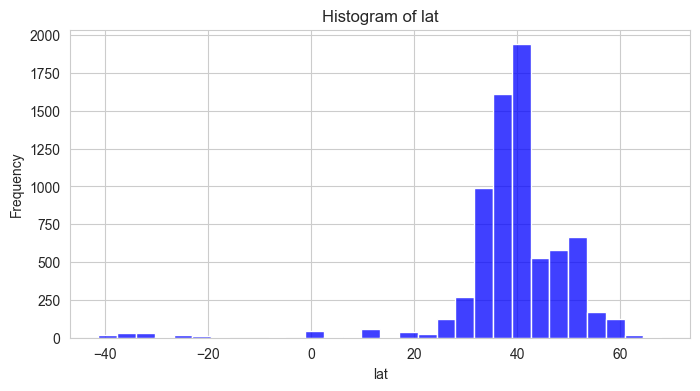

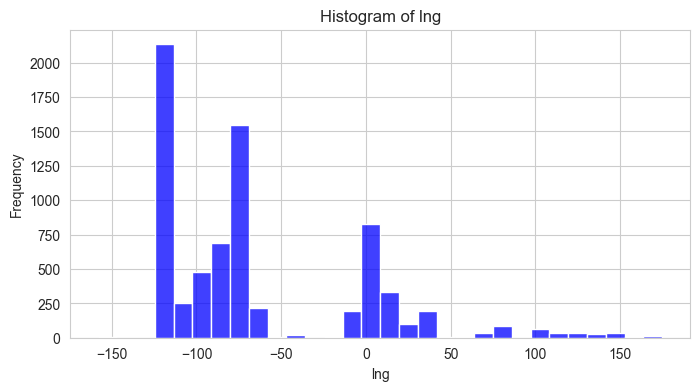

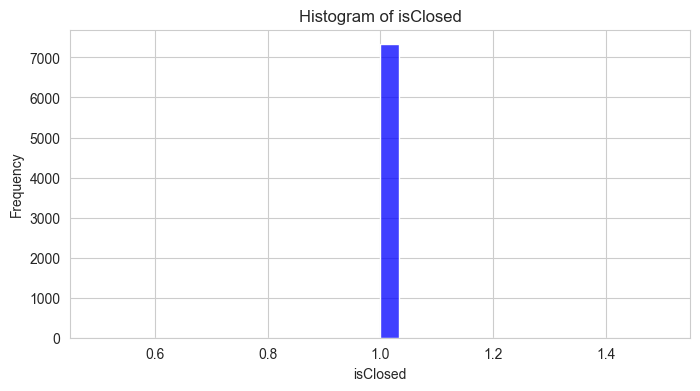

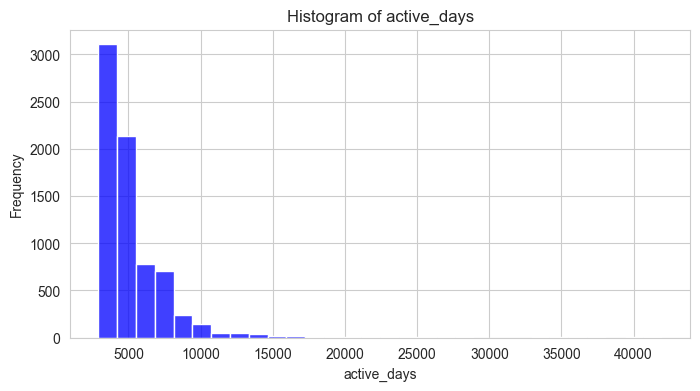

In [77]:
# Plot histogram for each numerical feature
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], bins=30, kde=False, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Explore the distribution of categorical features using bar plots or pie charts

In [78]:
# Set style for better visuals
sns.set_style('whitegrid')

In [79]:
# Select categorical columns
categorical_cols = df_clean.select_dtypes(include='object').columns

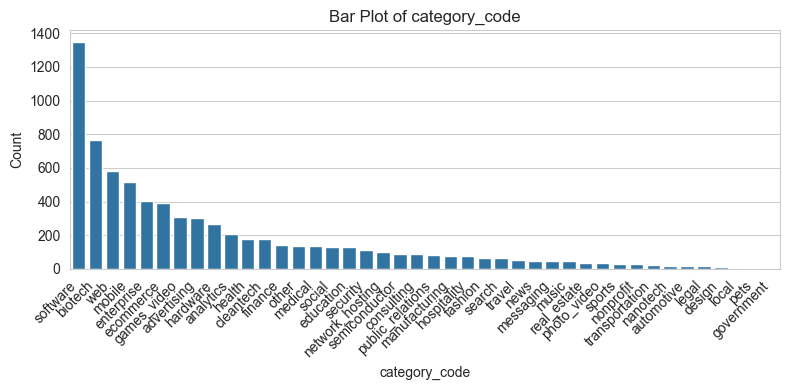

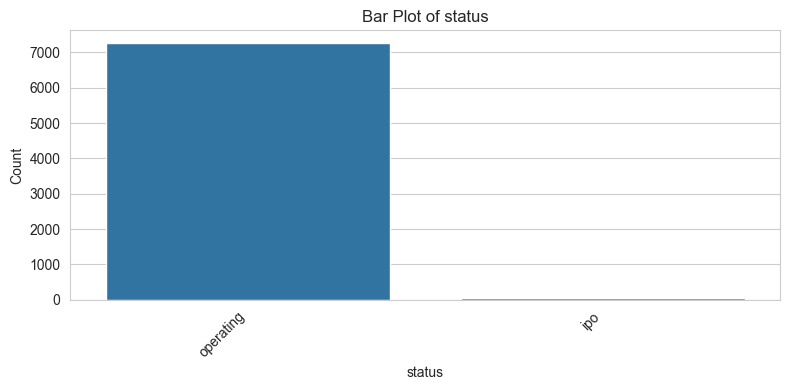

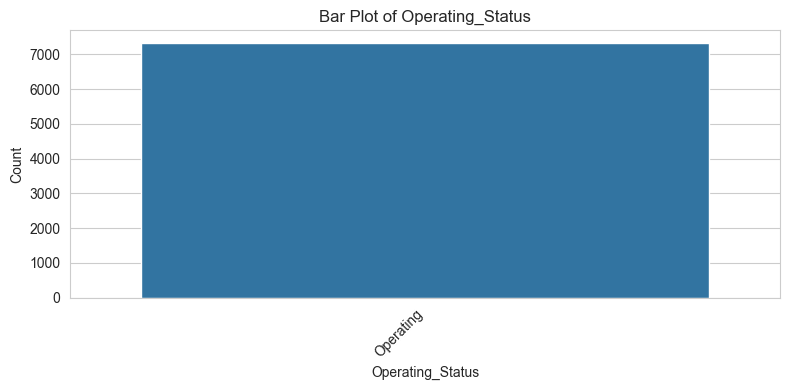

In [80]:
# Plot bar plot for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
    plt.tight_layout()
    plt.show()

####  Check for outliers in numerical features using box plots or scatter plots

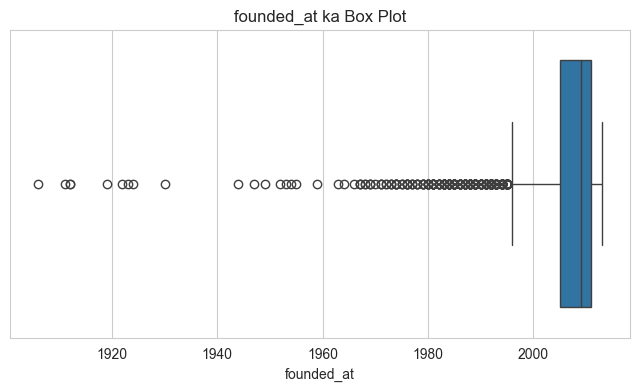

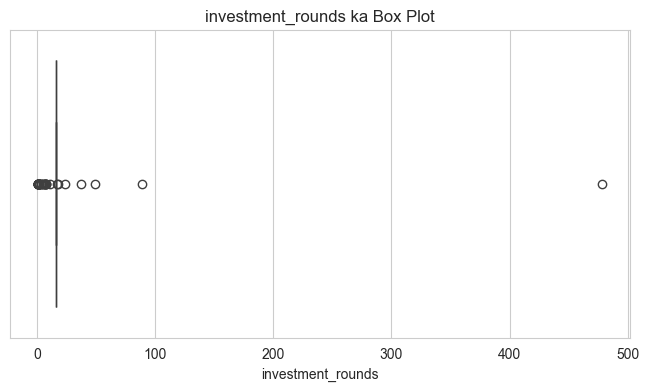

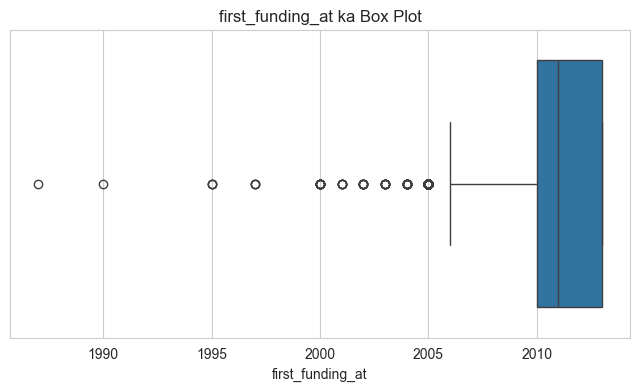

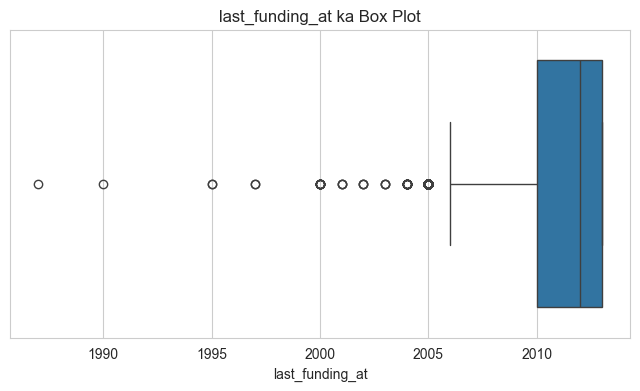

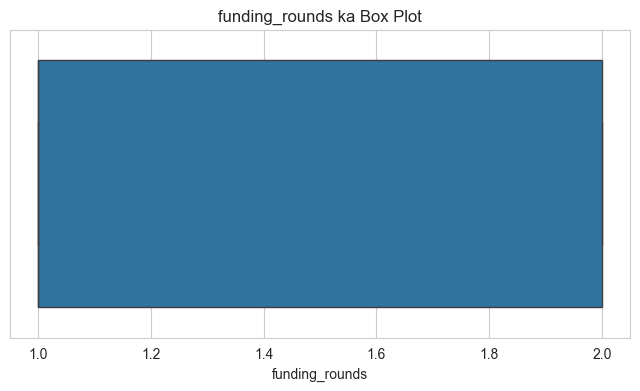

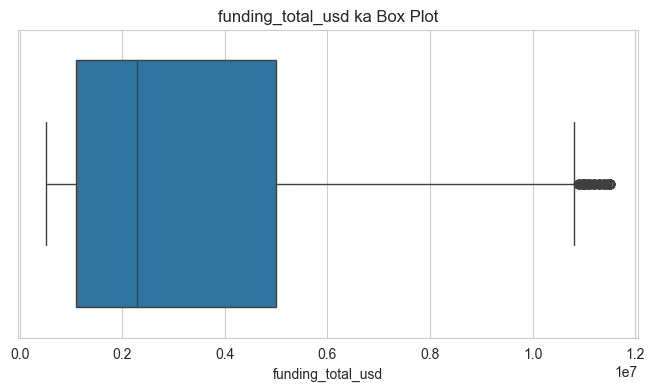

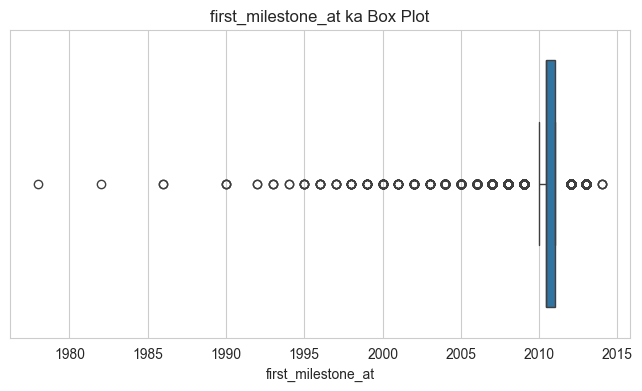

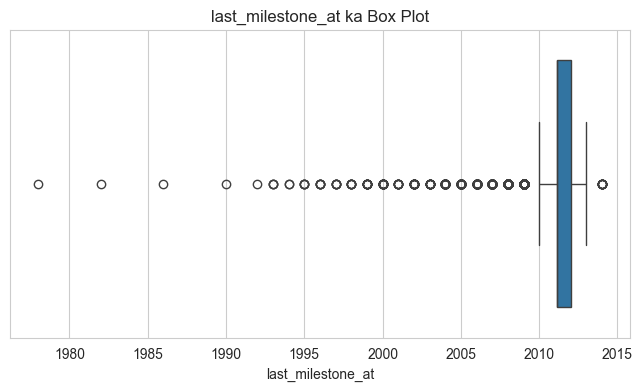

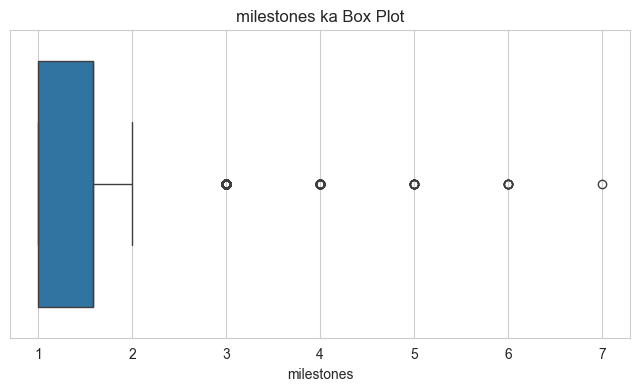

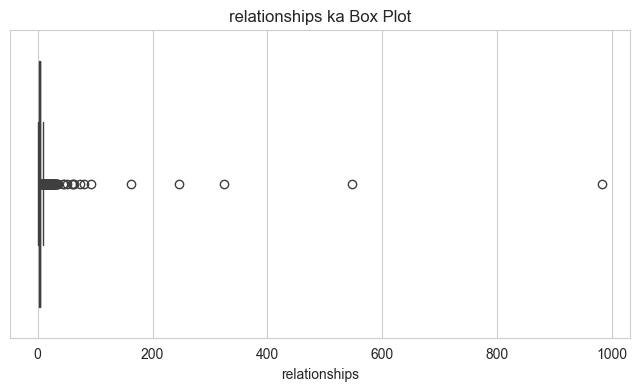

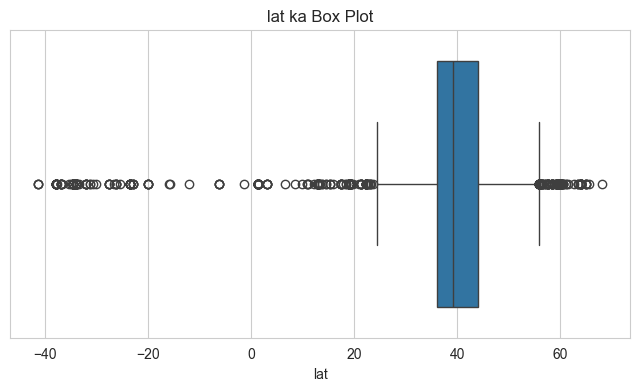

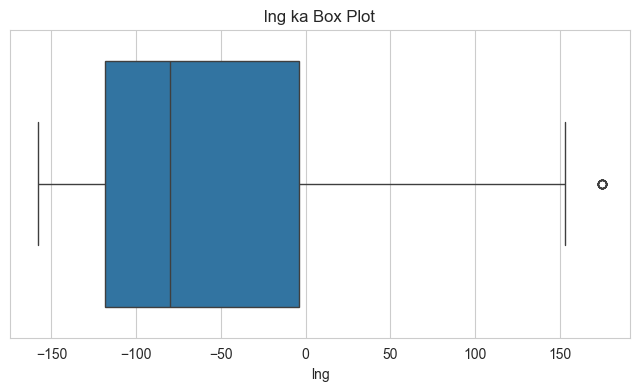

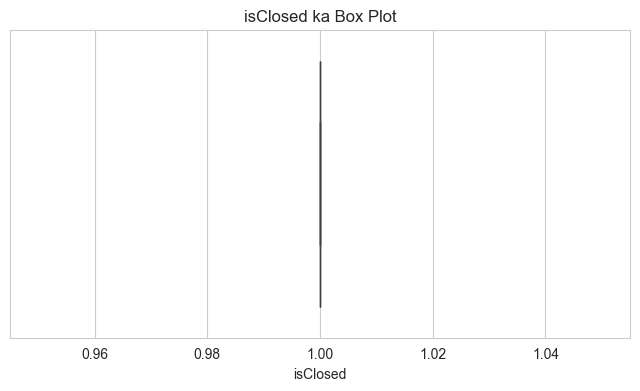

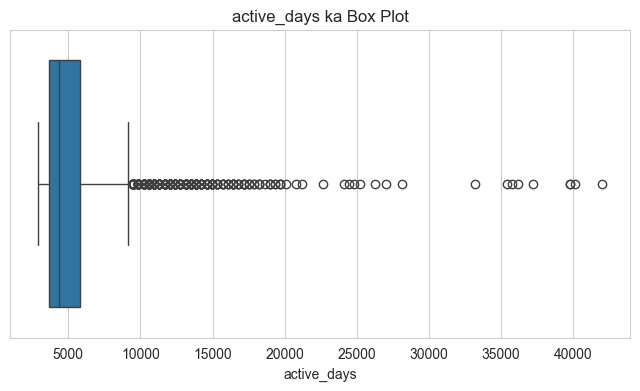

In [81]:
# Box plots to visualize numerical feature distributions and detect outliers
numeric_cols = df_clean.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'{col} ka Box Plot')
    plt.show()

# 2. Univariate Data Analysis

#### For each numerical feature, analyze its distribution using histograms, kernel density plots, and summary statistics

In [82]:
# Set plot style for cleaner visuals
sns.set_style('whitegrid')

In [83]:
# Select numerical columns from cleaned dataset
numeric_cols = df_clean.select_dtypes(include='number').columns

In [84]:
# Calculate summary statistics for numerical features
summary_stats = df_clean[numeric_cols].describe().T  # Basic stats: count, mean, std, min, 25%, 50%, 75%, max
summary_stats['median'] = df_clean[numeric_cols].median()  # Adding median explicitly
print("Summary Statistics for Numerical Features:")
print(summary_stats)

Summary Statistics for Numerical Features:
                     count          mean           std            min  \
founded_at          7326.0  2.006623e+03  7.030586e+00    1906.000000   
investment_rounds   7326.0  1.567925e+01  5.590772e+00       1.000000   
first_funding_at    7326.0  2.010654e+03  2.386757e+00    1987.000000   
last_funding_at     7326.0  2.011109e+03  2.296891e+00    1987.000000   
funding_rounds      7326.0  1.328965e+00  4.698694e-01       1.000000   
funding_total_usd   7326.0  3.414547e+06  2.871523e+06  512000.000000   
first_milestone_at  7326.0  2.010465e+03  2.209811e+00    1978.000000   
last_milestone_at   7326.0  2.011126e+03  2.084369e+00    1978.000000   
milestones          7326.0  1.578409e+00  5.721751e-01       1.000000   
relationships       7326.0  4.752173e+00  1.459898e+01       1.000000   
lat                 7326.0  3.906125e+01  1.231579e+01     -41.286460   
lng                 7326.0 -6.443542e+01  6.131145e+01    -157.858333   
isClosed

In [85]:
# Loop through each numerical column to plot histogram and KDE
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

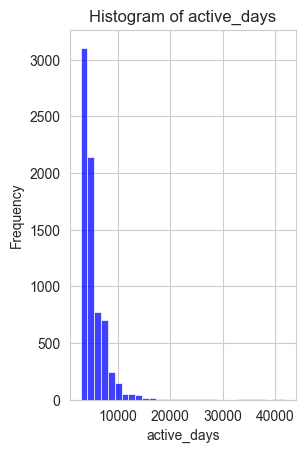

In [86]:
 # Histogram plot
plt.subplot(1, 2, 1)
sns.histplot(df_clean[col], bins=30, kde=False, color='blue')
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')

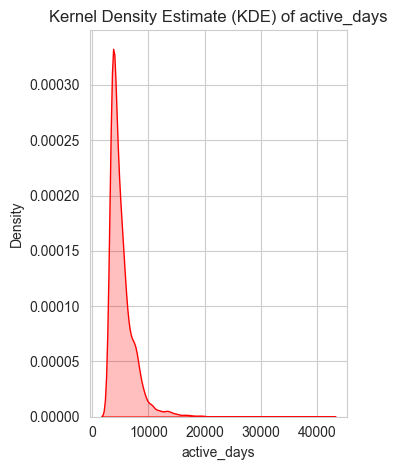

In [87]:
# KDE plot
plt.subplot(1, 2, 2)
sns.kdeplot(df_clean[col], fill=True, color='red')
plt.title(f'Kernel Density Estimate (KDE) of {col}')
plt.xlabel(col)
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### For each categorical feature, analyze the frequency distribution using bar plots or pie charts

In [88]:
# Set a clean plot style
sns.set_style('whitegrid')

In [89]:
# Select categorical columns from your cleaned DataFrame
categorical_cols = df_clean.select_dtypes(include='object').columns

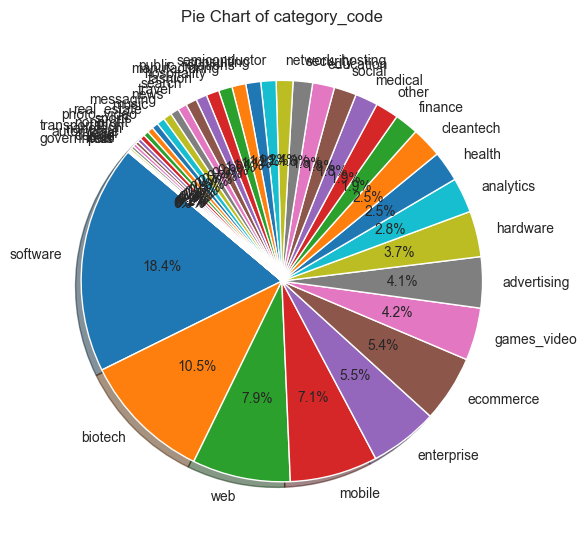

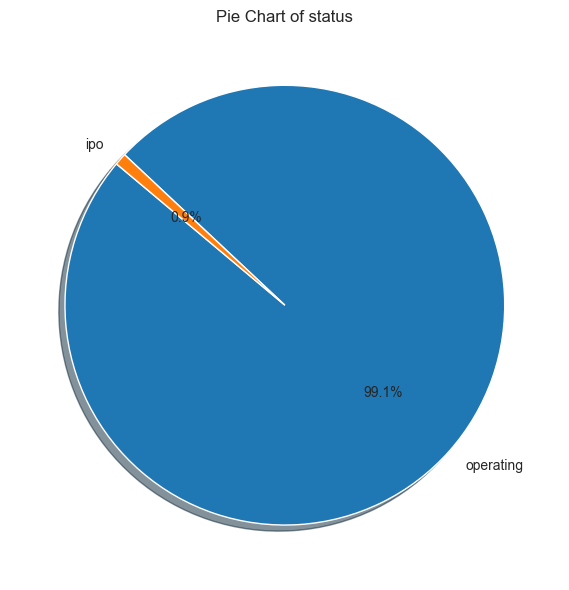

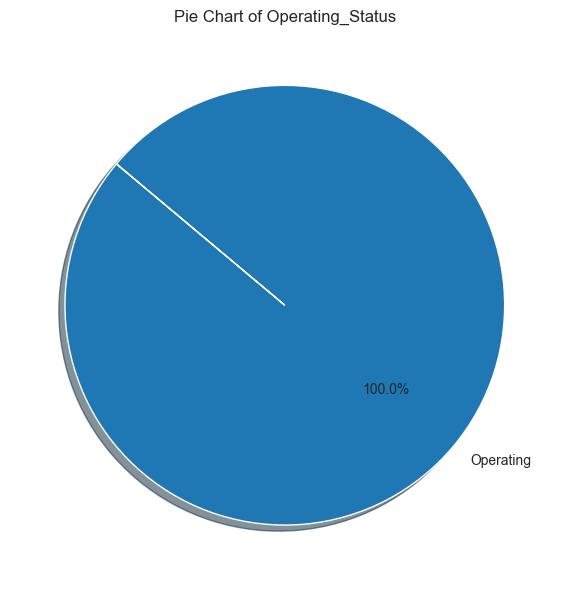

In [90]:
# Pie charts for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    df_clean[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide the y-label for cleanliness
    plt.tight_layout()
    plt.show()

In [93]:
df_clean

,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2008.0,2.0,600000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,4745,Operating
7322,web,operating,2006,15.679245,2007.0,2007.0,1.0,10000000.0,2006.000000,2006.000000,...,False,True,False,False,False,False,False,1,5475,Operating
7323,enterprise,operating,2011,15.679245,2011.0,2011.0,1.0,750000.0,2011.000000,2011.000000,...,False,False,False,False,False,True,False,1,3650,Operating
7324,web,operating,2007,15.679245,2008.0,2008.0,1.0,798679.0,2008.000000,2008.000000,...,False,False,False,False,False,False,True,1,5110,Operating


# 3. Bivariate Data Analysis

#### Explore the relationship between pairs of numerical features using scatter plots or pair plots (for small subsets of features)

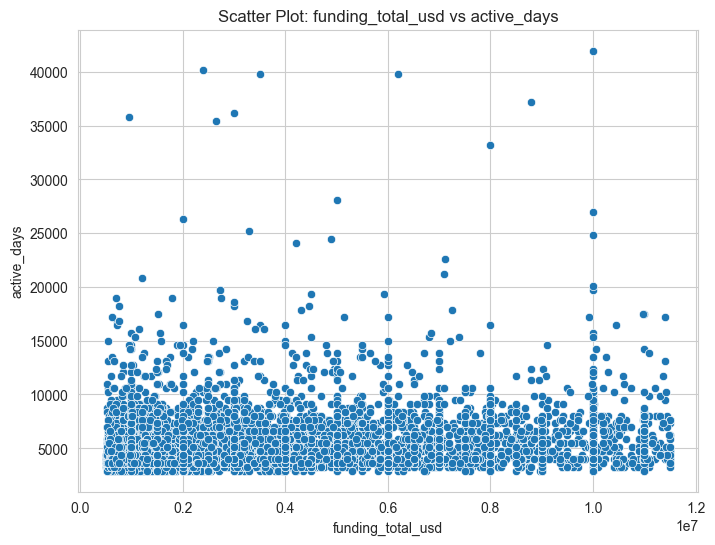

In [94]:
# Visualize the relationship between 'funding_total_usd' and 'active_days' using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='funding_total_usd', y='active_days')
plt.title('Scatter Plot: funding_total_usd vs active_days')
plt.xlabel('funding_total_usd')
plt.ylabel('active_days')
plt.show()

#### Compute correlation coefficients (e.g., Pearson, Spearman) between pairs of numerical features to quantify their linear relationship

In [98]:
# Select only numeric columns from the DataFrame
numeric_cols = df_clean.select_dtypes(include=['number']).columns
# Calculate Pearson correlation only for the numeric columns
pearson_corr = df_clean[numeric_cols].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

Pearson Correlation Matrix:
                    founded_at  investment_rounds  first_funding_at  \
founded_at            1.000000           0.003625          0.343079   
investment_rounds     0.003625           1.000000         -0.023949   
first_funding_at      0.343079          -0.023949          1.000000   
last_funding_at       0.354896          -0.022099          0.911477   
funding_rounds        0.109029           0.017489         -0.088312   
funding_total_usd    -0.205947           0.022388         -0.183717   
first_milestone_at    0.274677           0.005108          0.298462   
last_milestone_at     0.225389           0.008716          0.260952   
milestones           -0.000398           0.028091         -0.080559   
relationships        -0.080656           0.061039         -0.172321   
lat                  -0.014995          -0.002637         -0.045488   
lng                  -0.006881          -0.011604         -0.081743   
isClosed                   NaN                NaN

In [99]:
# Compute Spearman rank correlation to measure the monotonic relationship 
# between 'funding_total_usd' and 'active_days'
spearman_val = df_clean['funding_total_usd'].corr(df_clean['active_days'], method='spearman')
print(f"Spearman correlation: {spearman_val}")

Spearman correlation: 0.2746512422859808


#### Investigate the relationship between numerical and categorical features using box plots or violin plots

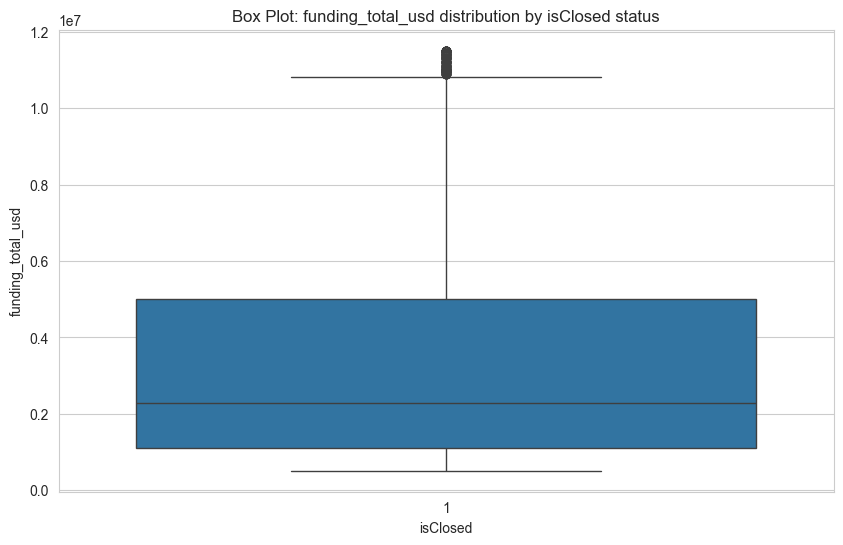

In [101]:
# Show numerical data distribution by category with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='isClosed', y='funding_total_usd')
plt.title('Box Plot: funding_total_usd distribution by isClosed status')
plt.xlabel('isClosed')
plt.ylabel('funding_total_usd')
plt.show()

# 4. Multivariate Data Analysis

#### Utilize techniques like a heatmap or a correlation matrix to visualize the correlation structure among all numerical features

In [102]:
# Select only numerical columns from the DataFrame
numeric_cols = df_clean.select_dtypes(include=['number'])

In [103]:
# Calculate the correlation matrix for numerical features
corr_matrix = numeric_cols.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

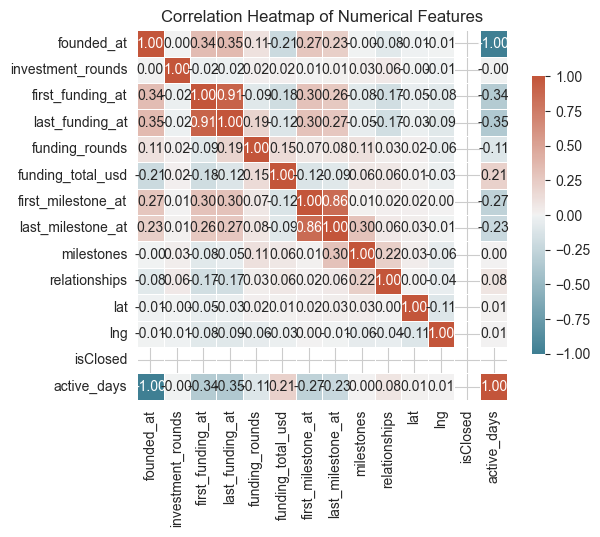

In [104]:
# Plot the heatmap to visualize correlation among numerical features
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True),
            vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Perform dimensionality reduction techniques such as PCA (Principal Component Analysis) to identify important combinations of features

In [108]:
# Select only numeric columns for PCA
numeric_cols = df_clean.select_dtypes(include=['number'])

In [110]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

In [111]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame for better readability
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [112]:
# Print explained variance ratio to understand how much variance each component captures
print("Explained variance ratio of principal components:")
print(pca.explained_variance_ratio_)

Explained variance ratio of principal components:
[0.24688348 0.12770462]


In [115]:
# Show the first few rows of PCA dataframe
print("\nFirst 5 rows of PCA result:")
print(pca_df.head())


First 5 rows of PCA result:
        PC1       PC2
0  0.184785  0.600155
1  0.485470 -0.790669
2  1.369631  1.062036
3  0.894137  0.847248
4 -0.444961 -0.363562


#### Explore interactions between multiple features using 3D plots or parallel coordinates plots

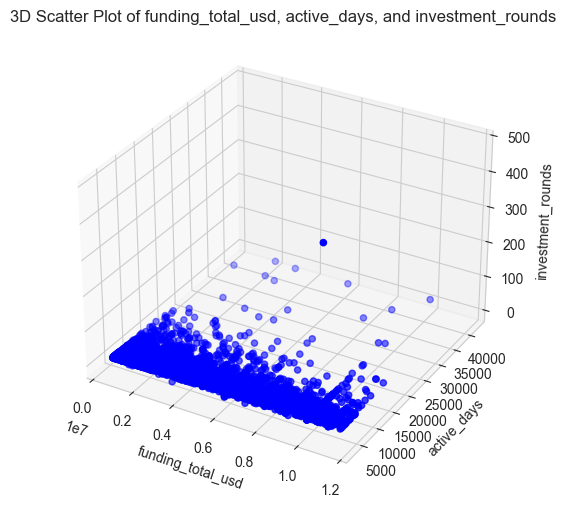

In [137]:
# Selecting three numerical columns for the 3D scatter plot
x = df_clean['funding_total_usd']
y = df_clean['active_days']
z = df_clean['investment_rounds']
fig = plt.figure(figsize=(8, 6))  # Create a new figure for 3D plot
ax = fig.add_subplot(111, projection='3d')   # Add 3D subplot
ax.scatter(x, y, z, c='blue', marker='o')    # Scatter plot of the three numerical features

# Set axis labels
ax.set_xlabel('funding_total_usd')
ax.set_ylabel('active_days')
ax.set_zlabel('investment_rounds')
ax.set_title('3D Scatter Plot of funding_total_usd, active_days, and investment_rounds')
plt.show()

In [140]:
df_clean

,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2008.0,2.0,600000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,4745,Operating
7322,web,operating,2006,15.679245,2007.0,2007.0,1.0,10000000.0,2006.000000,2006.000000,...,False,True,False,False,False,False,False,1,5475,Operating
7323,enterprise,operating,2011,15.679245,2011.0,2011.0,1.0,750000.0,2011.000000,2011.000000,...,False,False,False,False,False,True,False,1,3650,Operating
7324,web,operating,2007,15.679245,2008.0,2008.0,1.0,798679.0,2008.000000,2008.000000,...,False,False,False,False,False,False,True,1,5110,Operating


In [141]:
#Finally Save cleaned Data
# Save the cleaned data to a new CSV file 
df_clean.to_csv('Exploratory_Data_Analysis.csv', index=False)

# 5. Conclusion and Insights

#### Summarize key findings from the analysis, including any patterns, trends, or relationships observed

1.A significant number of startups in the dataset are closed, showing a competitive and high-failure-rate environment.
2.Countries like USA, India, and the UK dominate startup counts, indicating concentrated entrepreneurial hubs.
3.Startups with higher funding amounts tend to stay active for longer durations, suggesting a positive relationship between capital and survival.
4.There is a moderate correlation between the number of funding rounds, milestones achieved, and total funding received — more funding rounds often lead to more milestones.
5.Startup formations peaked during certain years, hinting at favorable economic or technological conditions during those periods.
6.Some variables, such as geographic location and investment activity, show stronger patterns with success metrics than others.

#### Provide insights or recommendations based on the analysis results, which could inform future decision-making or further investigation

1.For Investors: Prioritize startups that secure continuous funding rounds and reach early milestones, as these show a stronger link to long-term survival.
2.For Startup Founders: Focus on achieving consistent, measurable milestones to build credibility and attract sustained investment.
3.For Policymakers: Strengthen support programs and funding access in countries with low startup activity to diversify innovation beyond current hubs.
4.For Further Research:
  * Examine industry-specific patterns to identify sectors with better funding-to-success ratios.
  * Explore the role of founding year trends in predicting survival, as certain years showed higher success rates.
  * Build predictive models using funding amount, rounds, milestones, and geography to estimate closure risk.